In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('car.data', header=None)
df.columns = ['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety', 'Class']
# Replacing the column header with custom header.
print(df.head())

  Buying  Maint Doors Persons Lug_boot Safety  Class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


In [3]:
df.describe()

,Buying,Maint,Doors,Persons,Lug_boot,Safety,Class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [4]:
print(df.shape)

(1728, 7)


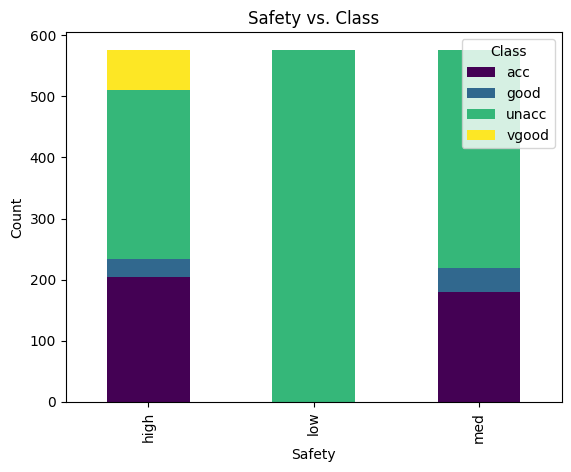

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
pd.crosstab(df['Safety'], df['Class']).plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Safety vs. Class")
plt.xlabel("Safety")
plt.ylabel("Count")
plt.legend(title="Class")
plt.show()


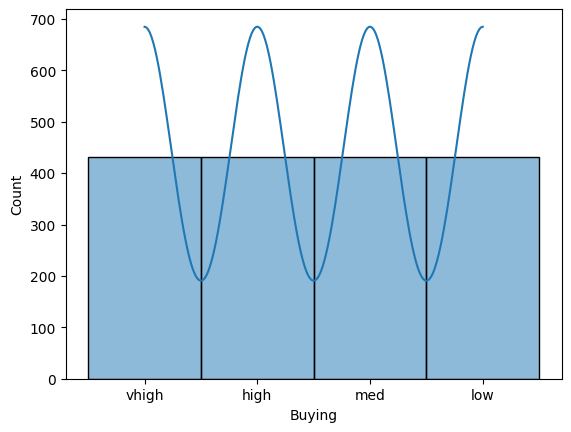

In [6]:
sns.histplot(data=df, x="Buying", kde=True)
plt.show()
# As an example, we used column "Buying" from which we can see that number values from this column is balanced.
# Doing this for every other column except "Class" will also show balanced number values.

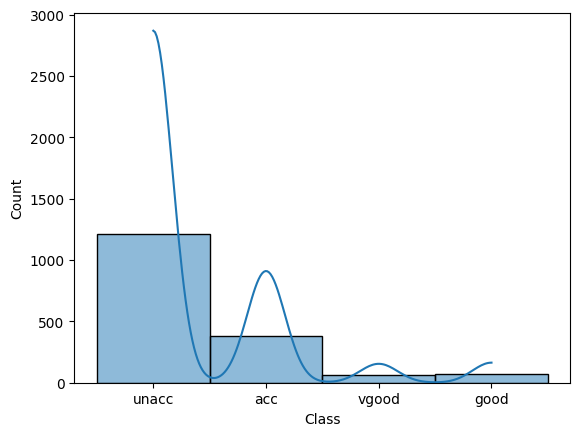

In [7]:
sns.histplot(data=df, x="Class", kde=True)
plt.show()
#In case of column "Class" we can see that this dataset is not balanced.

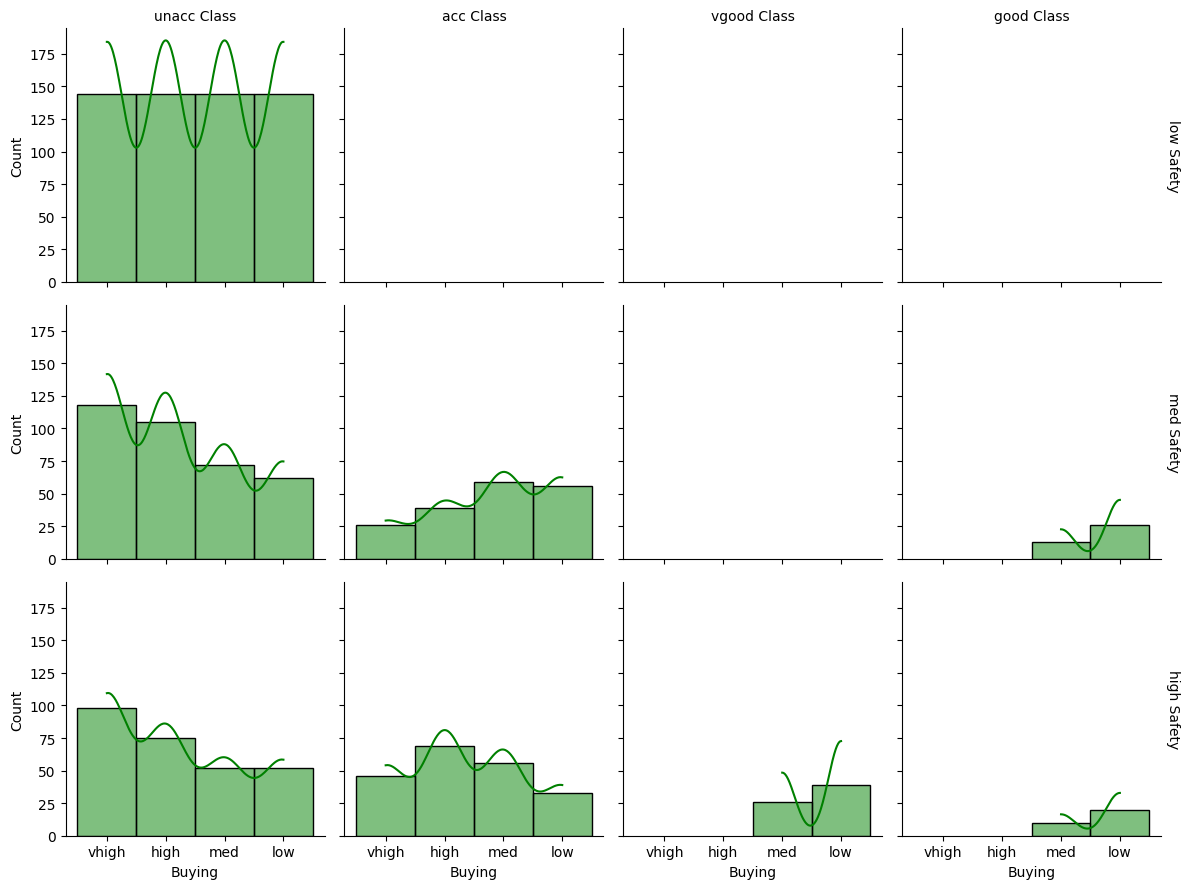

In [8]:
g = sns.FacetGrid(df, col="Class", row="Safety", margin_titles=True, height=3)
g.map(sns.histplot, "Buying", kde=True, color="green")
g.set_titles(col_template="{col_name} Class", row_template="{row_name} Safety")
plt.show()
#This graph is a FacetGrid, which is used to visualize the relationships between multiple categorical variables. 
#It shows the distribution of the ‘Buying’ feature for each combination of ‘Class’ and ‘Safety’ levels.

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for column in df.columns:
    df[column] = encoder.fit_transform(df[column])

print(df.head())

   Buying  Maint  Doors  Persons  Lug_boot  Safety  Class
0       3      3      0        0         2       1      2
1       3      3      0        0         2       2      2
2       3      3      0        0         2       0      2
3       3      3      0        0         1       1      2
4       3      3      0        0         1       2      2


                Buying         Maint         Doors       Persons  \
Buying    1.000000e+00 -3.436808e-16 -2.097088e-16 -4.089152e-17   
Maint    -3.436808e-16  1.000000e+00 -6.466021e-17 -4.272143e-17   
Doors    -2.097088e-16 -6.466021e-17  1.000000e+00  1.956599e-17   
Persons  -4.089152e-17 -4.272143e-17  1.956599e-17  1.000000e+00   
Lug_boot -1.691262e-16 -1.549092e-16 -1.942523e-17  3.854941e-18   
Safety   -2.439415e-16 -1.404810e-16  1.062757e-16  3.392348e-17   
Class     5.142422e-02  4.019365e-02 -3.132740e-02 -2.994683e-01   

              Lug_boot        Safety     Class  
Buying   -1.691262e-16 -2.439415e-16  0.051424  
Maint    -1.549092e-16 -1.404810e-16  0.040194  
Doors    -1.942523e-17  1.062757e-16 -0.031327  
Persons   3.854941e-18  3.392348e-17 -0.299468  
Lug_boot  1.000000e+00 -1.541976e-17  0.033184  
Safety   -1.541976e-17  1.000000e+00 -0.021044  
Class     3.318432e-02 -2.104372e-02  1.000000  


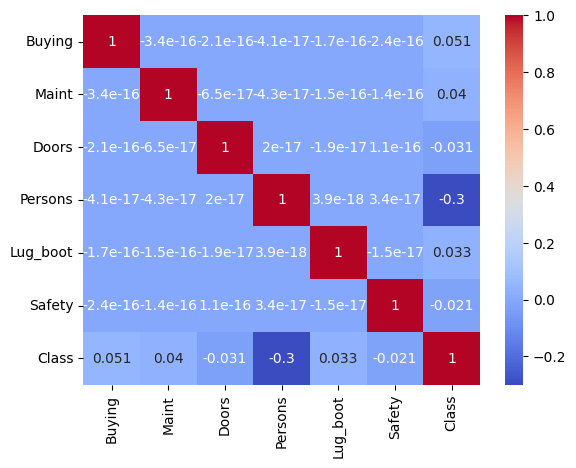

In [10]:
print(df.corr())
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [11]:
# This is a heatmap from which we can see that there are no columns in correlation which basically means:
# A) We can use every column for better results.
# B) We don't have to remove any column for better performance.

# Judging from this heatmap we can see that "Buying" has the biggest correlation with "Class".
# This indicates that "Buying" is the biggest factor in affecting car score.

In [12]:
print(df.isnull().any().any())
# Checking missing values

False


In [13]:
Q1 = df['Buying'].quantile(0.25)
Q3 = df['Buying'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['Buying'] < lower_bound) | (df['Buying'] > upper_bound)]
print("Number of outliers:", len(outliers))

Number of outliers: 0


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df.drop(columns = ['Class']))
y = df['Class']
# Scaling numeric values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
model_tree = DecisionTreeClassifier()
model_svm = SVC()
model_gb = GradientBoostingClassifier(random_state=42)

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

In [18]:
model_tree.fit(X_train, y_train)
model_svm.fit(X_train, y_train)
model_gb.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)
y_pred_svm = model_svm.predict(X_test)
y_pred_gb = model_gb.predict(X_test)

In [19]:
conf_tree = confusion_matrix(y_test, y_pred_tree)
conf_svm = confusion_matrix(y_test, y_pred_svm)
conf_gb = confusion_matrix(y_test, y_pred_gb)

In [20]:
acc_tree = accuracy_score(y_test, y_pred_tree)
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_gb = accuracy_score(y_test, y_pred_gb)

In [21]:
prec_tree = precision_score(y_test, y_pred_tree, average='micro')
prec_svm = precision_score(y_test, y_pred_svm, average='micro')
prec_gb = precision_score(y_test, y_pred_gb, average='micro')

In [22]:
rec_tree = recall_score(y_test, y_pred_tree, average='micro')
rec_svm = recall_score(y_test, y_pred_svm, average='micro')
rec_gb = recall_score(y_test, y_pred_gb, average='micro')

In [23]:
print(conf_tree, end='\n\n')
print(conf_svm, end='\n\n')
print(conf_gb)

[[ 84   0   0   1]
 [  3  11   0   0]
 [  0   0 232   0]
 [  0   0   0  15]]

[[ 70   3  12   0]
 [  6   5   0   3]
 [  5   0 227   0]
 [  1   0   0  14]]

[[ 84   0   0   1]
 [  0  11   0   3]
 [  2   0 230   0]
 [  0   0   0  15]]


In [24]:
acc_tree, acc_svm, acc_gb

(0.9884393063583815, 0.9132947976878613, 0.9826589595375722)

In [25]:
prec_tree, prec_svm, prec_gb

(0.9884393063583815, 0.9132947976878613, 0.9826589595375722)

In [26]:
rec_tree, rec_svm, rec_gb

(0.9884393063583815, 0.9132947976878613, 0.9826589595375722)

In [27]:
#From all of the evaluation metrics we can conclude that the best model for this dataset is Gradient Boosting.

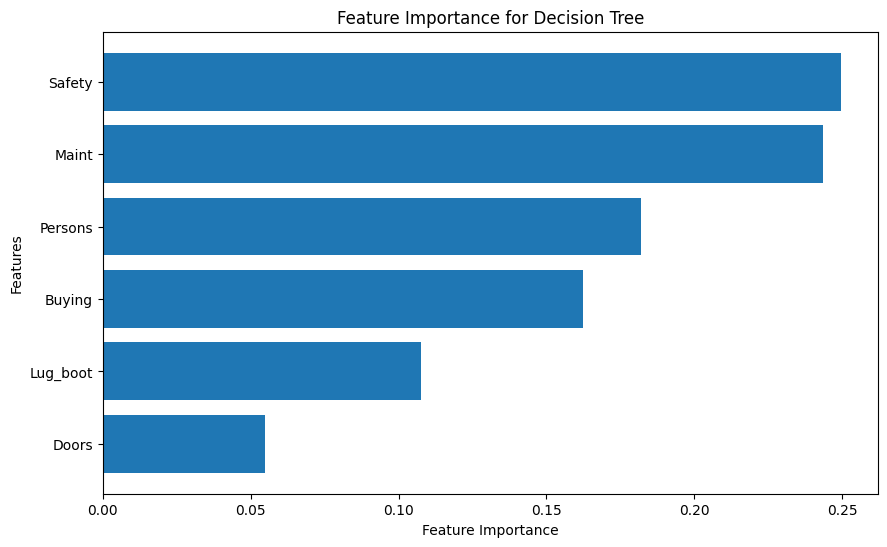

In [28]:
importances = model_tree.feature_importances_

feature_names = df.columns[:-1]
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance for Decision Tree")
plt.gca().invert_yaxis()
plt.show()

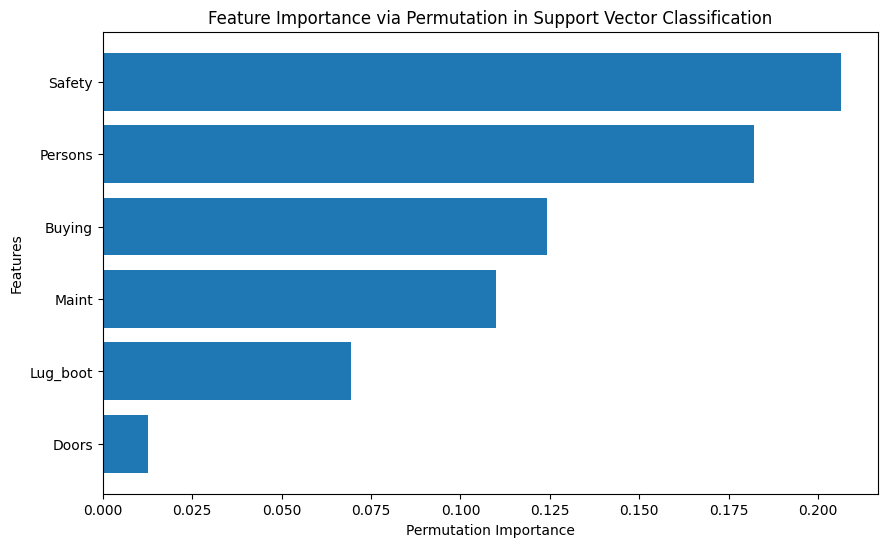

In [29]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model_svm, X_test, y_test, scoring='accuracy')

perm_importance_df = pd.DataFrame({'Feature': df.columns[:-1], 'Importance': perm_importance.importances_mean})
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(perm_importance_df['Feature'], perm_importance_df['Importance'])
plt.xlabel("Permutation Importance")
plt.ylabel("Features")
plt.title("Feature Importance via Permutation in Support Vector Classification")
plt.gca().invert_yaxis()
plt.show()

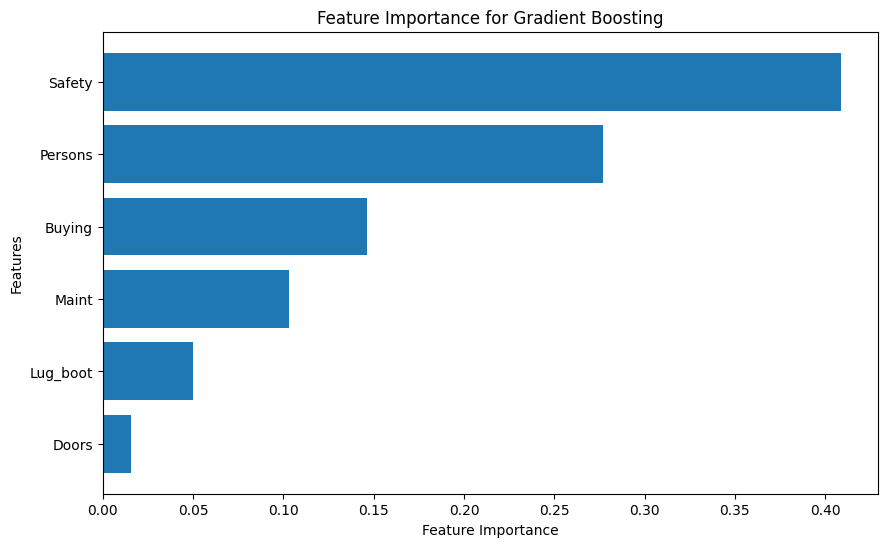

In [30]:
importances = model_gb.feature_importances_

feature_names = df.columns[:-1]
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance for Gradient Boosting")
plt.gca().invert_yaxis()
plt.show()

In [31]:
# Based on these models we can come to a conclusion that 'Safety' has the most influense on the car score.
# We can also see that GradientBoosting and SVC always have the same results, 
# Sometimes, when rerunning the program it can occur that 'Persons' or 'Maint have bigger Feature Importance than Safety in one of 3 cases.
# Still, that does not change the fact that 'Safety is the biggest factor on the car score.

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42), 
    param_grid=param_grid, 
    scoring='f1_weighted',   
    cv=5,                         
    n_jobs=-1             
)

grid_search.fit(X_train, y_train)

# Results
print("Best results:", grid_search.best_params_)
print(f"Best score: {100 * grid_search.best_score_:.3f} %")

Best results: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
Best score: 99.495 %
